In [1]:
import pandas as pd
import numpy as np

# Data Preparation

In [2]:
df = pd.read_csv(r'C:\Users\Faezeh\Downloads\car-price_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df_orig = df.copy()
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type','Vehicle Style', 'highway MPG',
         'city mpg','MSRP']]

In [5]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
# Lowercase the column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [8]:
# Fill the missing values with 0
df.fillna(0, inplace = True)

In [9]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

### Make the price binary

In [10]:
# Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
df['above_average'] = (df['msrp'] > df['msrp'].mean()).astype(int)
df['above_average'].head()

0    1
1    1
2    0
3    0
4    0
Name: above_average, dtype: int32

### Split the data into 3 parts: train/validation/test

In [11]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution.
# Use train_test_split function for that with random_state=1
from sklearn.model_selection import train_test_split

df_train_val, df_test = train_test_split(df, test_size= 0.2, random_state= 1)
df_train , df_val = train_test_split(df_train_val, test_size= 0.25, random_state= 1)

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [12]:
len(df), (len(df_train) + len(df_val) + len(df_test))

(11914, 11914)

In [13]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

del df_train['msrp']
del df_train['above_average']
del df_val['msrp']
del df_val['above_average']
del df_test['msrp']
del df_test['above_average']

In [14]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

# Q1

### ROC AUC feature importance

In [15]:
# df.dtypes

In [16]:
numerical_features = list(df_train.columns[df_train.dtypes != 'object']) # either of: df_train/df_val/df_test
numerical_features

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [17]:
categorical_features = list(df.columns[df.dtypes == 'object'])
categorical_features

['make', 'model', 'transmission_type', 'vehicle_style']

In [18]:
from sklearn.linear_model import LogisticRegression
#import sklearn.metrics.roc_auc_score
from sklearn.metrics import roc_auc_score

val_temp_roc_scores = {}
for numerical_feature in numerical_features:
    #print(numerical_feature)
    df_train_temp = df_train[numerical_feature].copy()
    df_val_temp = df_val[numerical_feature].copy()

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) # define the model/classifier
    
    model.fit(df_train_temp.to_frame(), y_train) # training the model
    y_val_pred = model.predict(df_val_temp.to_frame()) # inference on the validation data       
    
    val_temp_roc_score = roc_auc_score(y_val, y_val_pred)
    
    if val_temp_roc_score < 0.5:
        df_train_temp = -df_train[numerical_feature].copy()
        df_val_temp = -df_val[numerical_feature].copy()

        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) # define the model/classifier

        model.fit(df_train_temp.to_frame(), y_train) # training the model
        y_val_pred = model.predict(df_val_temp.to_frame()) # inference on the validation data       

        val_temp_roc_score = roc_auc_score(y_val, y_val_pred) # performance metric/ Performance evaluation
        
    val_temp_roc_scores[numerical_feature] = val_temp_roc_score

val_temp_roc_scores

{'year': 0.5,
 'engine_hp': 0.7966431604770571,
 'engine_cylinders': 0.6923457196272261,
 'highway_mpg': 0.5,
 'city_mpg': 0.5022935779816514}

In [19]:
features_auc = [
    'engine_hp', 
    'engine_cylinders',
    'highway_mpg',
    'city_mpg'
]

import math
high_auc = -math.inf
high_feature = ''
for feature in features_auc:
    if val_temp_roc_scores[feature] >= high_auc:
        high_feature = feature
        high_auc = val_temp_roc_scores[feature]
        
        
high_feature, high_auc

('engine_hp', 0.7966431604770571)

In [20]:
roc_auc_score(y_val, y_val_pred).round(3)

0.502

In [21]:
# categorical_features

In [22]:
# numerical_features

# Question 2: Training the model

### one-hot-encoding using DictVectorizer

In [23]:
# Use Scikit-Learn to one-hot encode categorical features
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False) # create an instance of the the Dictvectorizer 

train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict) # .fit() and .transform() 

val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter = 1000)

model.fit(X_train, y_train)
y_val_pred = model.predict(X_val) ##
val_roc_score = roc_auc_score(y_val, y_val_pred) ##
val_roc_score.round(3)

0.913

# Question 3: Precision and Recall

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred)
#print(len(precision), len(recall), len(thresholds))

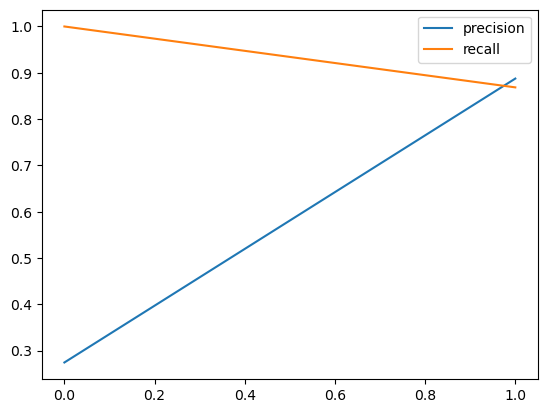

In [26]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label = 'precision')
plt.plot(thresholds, recall[:-1], label = 'recall')
plt.legend()

# Question 4: F1 score

In [27]:
from sklearn.metrics import f1_score

f1_scores = 2 * (np.array(precision) * np.array(recall)) / (np.array(precision) + np.array(recall))
max_f1_score = max(f1_scores)
threshold_max_f1 = thresholds[np.argmax(f1_scores)]
max_f1_score, threshold_max_f1

(0.8778979907264296, 1)

# Question 5: 5-Fold CV

In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kf.split(df_train_val):
    df_train = df_train_val.iloc[train_idx]
    df_val = df_train_val.iloc[val_idx]
    
    y_train = df_train['above_average']
    y_val = df_val['above_average']
    
    train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
   
    val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter = 1000)

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    val_roc_score = roc_auc_score(y_val, y_val_pred)
    scores.append(val_roc_score.round(3))
    
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.917 +- 0.010


In [31]:
for c in [0.01, 0.1, 0.5, 10]:
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kf.split(df_train_val):
        df_train = df_train_val.iloc[train_idx]
        df_val = df_train_val.iloc[val_idx]

        y_train = df_train['above_average']
        y_val = df_val['above_average']

        train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)


        val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
        X_val = dv.transform(val_dict)

        model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter = 1000)

        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

        val_roc_score = roc_auc_score(y_val, y_val_pred)
        scores.append(val_roc_score.round(3))

print('C = %s %.3f +- %.3f' % (c, np.mean(scores), np.std(scores)))

C = 10 0.917 +- 0.010
